In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'GCP-Coupons-Instructions.rtf', 'train.csv']


In [77]:
train = pd.read_csv("../input/train.csv", nrows = 1000000)
test = pd.read_csv("../input/test.csv")

In [78]:
train.shape

(1000000, 8)

In [79]:
test.shape

(9914, 7)

In [80]:
train.head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [81]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [82]:
train.isnull().sum().sort_values(ascending = False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [83]:
test.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [84]:
train = train.drop(train[train.isnull().any(1)].index)

In [85]:
train.shape

(999990, 8)

In [86]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [87]:
from collections import Counter

In [88]:
Counter(train['fare_amount']<0)

Counter({False: 999952, True: 38})

In [89]:
train = train.drop(train[train['fare_amount']<0].index, axis = 0)

In [90]:
train['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [91]:
train['fare_amount'].sort_values( ascending = False)

101885    500.00
247671    495.00
287638    450.00
233874    450.00
329010    450.00
361793    400.00
451974    400.00
951810    347.54
578919    287.08
130460    281.05
309769    263.25
719764    262.04
142550    255.00
888472    250.25
351584    250.00
217225    245.41
786490    243.00
149769    240.00
168218    235.00
202499    225.00
612128    220.00
806692    220.00
196990    217.00
784935    215.00
416989    215.00
225249    215.00
285659    214.33
110337    212.00
215662    211.44
979151    210.00
           ...  
671873      0.01
895361      0.00
762802      0.00
331597      0.00
266485      0.00
520715      0.00
670254      0.00
489767      0.00
938020      0.00
27891       0.00
897211      0.00
788466      0.00
957590      0.00
930680      0.00
386734      0.00
47302       0.00
760662      0.00
942215      0.00
431819      0.00
949564      0.00
436658      0.00
175352      0.00
10002       0.00
561786      0.00
681342      0.00
689250      0.00
211455      0.00
211499      0.

In [92]:
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [93]:
train[train['passenger_count'] > 6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [94]:
train = train.drop(train[train['passenger_count'] == 208].index, axis = 0)

In [95]:
train['passenger_count'].describe()

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [96]:
train[train['pickup_latitude'] < -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [97]:
train[train['pickup_latitude'] > 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [98]:
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [99]:
train.shape

(999939, 8)

In [100]:
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)

In [101]:
train.shape

(999928, 8)

In [102]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [103]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [104]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [105]:
train['key'] = pd.to_datetime(train['key'])

In [106]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [107]:
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [108]:
train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [109]:
test.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [110]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [111]:
def haversine(lat1, long1, lat2, long2):
    data = [train,test]
    for i in data:
        R = 6371
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long1] - i[long2])
        
        a = np.sin( delta_phi / 2.0 ) ** 2 + np.cos(phi1)* np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        d = R * c
        
        i['H_Distance'] = d
        
    return d

In [112]:
haversine('pickup_latitude','pickup_longitude', 'dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [113]:
train['H_Distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: H_Distance, dtype: float64

In [114]:
test['H_Distance'].head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: H_Distance, dtype: float64

In [115]:
data = [train, test]

In [116]:
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day_of_week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [117]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


Text(0,0.5,'Frequency')

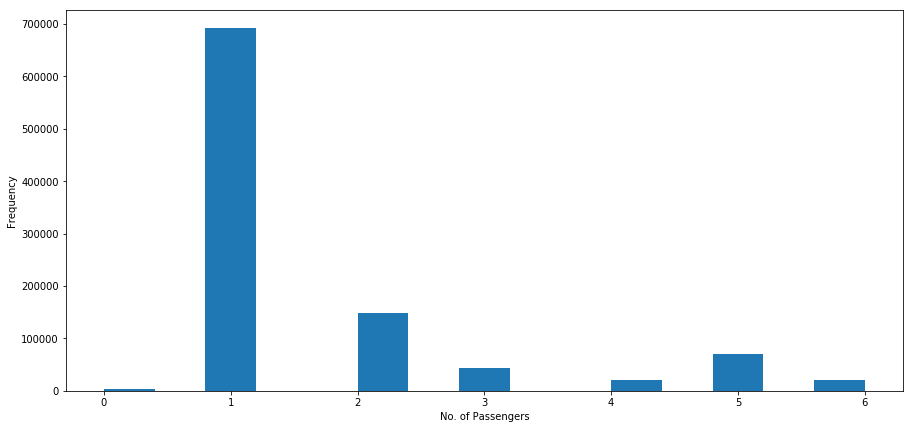

In [118]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

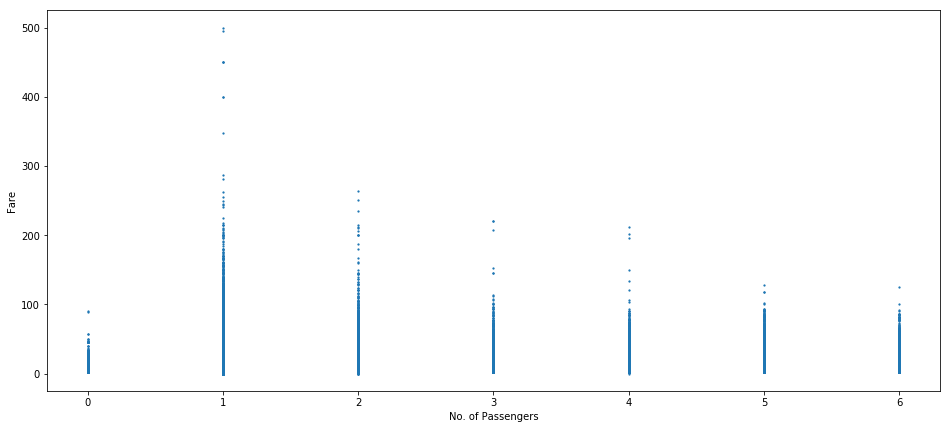

In [119]:
plt.figure( figsize = (16,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s = 1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0,0.5,'freq')

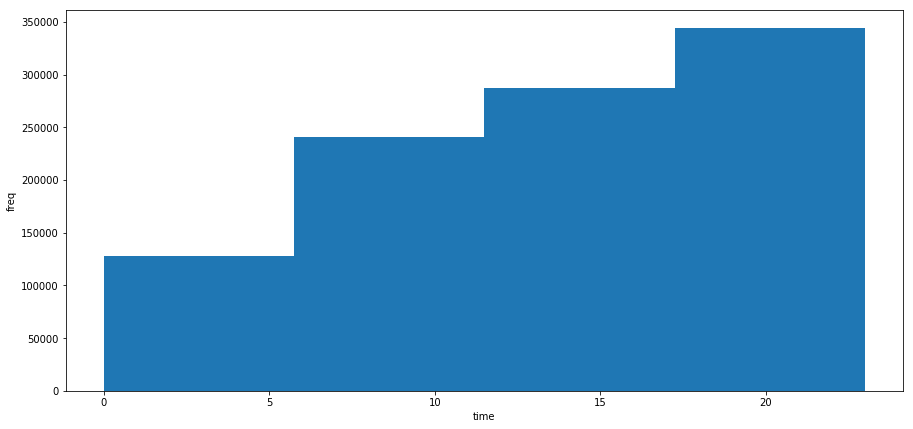

In [120]:
plt.figure(figsize = (15,7))
plt.hist(train['Hour'],bins = 4)
plt.xlabel('time')
plt.ylabel('freq')

Text(0,0.5,'freq')

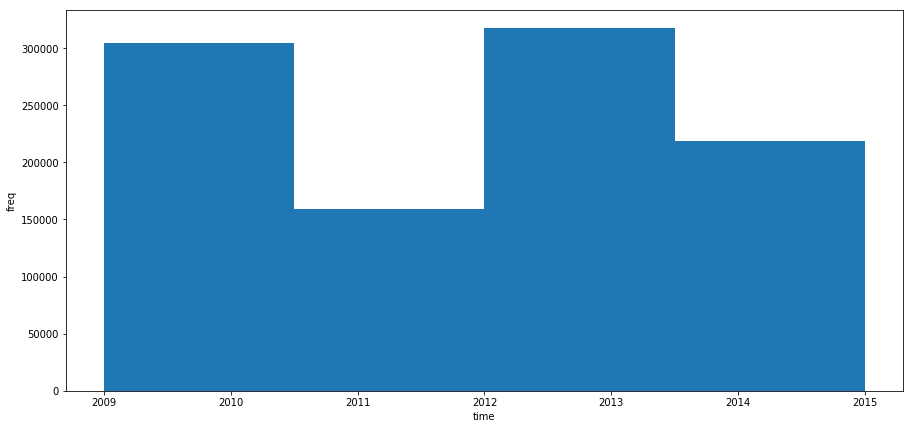

In [121]:
plt.figure(figsize = (15,7))
plt.hist(train['Year'],bins = 4)
plt.xlabel('time')
plt.ylabel('freq')

Text(0,0.5,'freq')

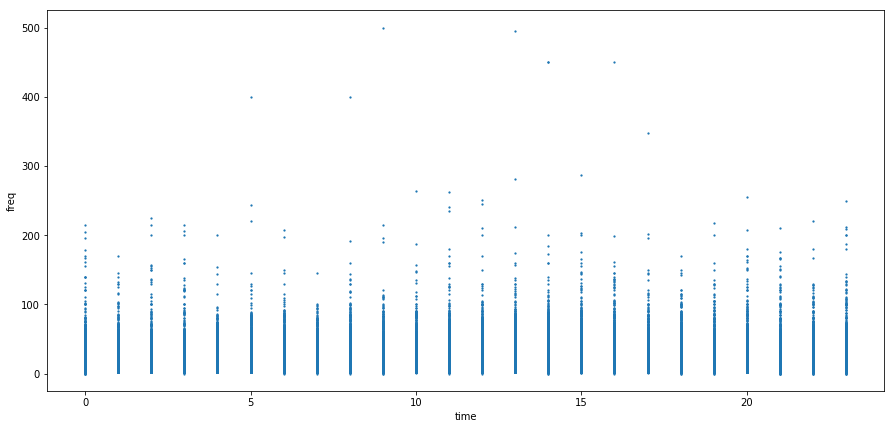

In [122]:
plt.figure(figsize = (15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s = 1.5)
plt.xlabel('time')
plt.ylabel('freq')

In [123]:
train.sort_values(['H_Distance','fare_amount'], ascending = False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_week,Hour
793922,2012-06-03 11:19:37.000000200,32.10,2012-06-03 11:19:37,-73.863359,40.769278,45.581619,-2.013462,2,12594.704725,2012,6,3,6,11
269695,2012-05-24 09:00:00.000000101,17.70,2012-05-24 09:00:00,-73.997572,40.720945,-1329.621332,40.773717,1,10942.515639,2012,5,24,3,9
646132,2012-02-08 20:24:00.000000173,10.50,2012-02-08 20:24:00,-89.439785,1.707957,0.000000,0.000000,1,9945.278008,2012,2,8,2,20
823943,2010-11-14 21:40:00.000000590,4.90,2010-11-14 21:40:00,0.000000,0.000000,-73.960303,81.510177,1,9747.587427,2010,11,14,6,21
401445,2011-02-26 03:28:03.000000600,14.50,2011-02-26 03:28:03,0.000000,0.000000,-75.433371,40.752047,1,8786.235625,2011,2,26,5,3
207647,2011-04-19 17:56:04.000000300,38.90,2011-04-19 17:56:04,0.000000,0.000000,-75.423754,40.773877,1,8785.843243,2011,4,19,1,17
336392,2011-05-11 20:06:55.000000600,34.50,2011-05-11 20:06:55,0.000000,0.000000,-75.294555,40.699667,1,8773.725816,2011,5,11,2,20
830134,2011-03-01 00:23:54.000000100,45.00,2011-03-01 00:23:54,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,3,1,1,0
527929,2011-03-01 21:31:43.000000300,7.70,2011-03-01 21:31:43,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,3,1,1,21
419362,2011-04-03 13:59:31.000000200,5.70,2011-04-03 13:59:31,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,4,3,6,13


In [124]:
len(train)

999920

In [125]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [126]:
Counter(dist_bins['bins'])

Counter({'0': 28481,
         '0-10': 920071,
         '11-50': 49073,
         '51-100': 147,
         '100-200': 206,
         '201-300': 5,
         '>300': 1937})

In [127]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [128]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [129]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [130]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


In [131]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
train.update(high_distance)

In [133]:
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day_of_week']>=1) & (train['Day_of_week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,14.0


In [134]:
train.drop(rush_hour.index, axis = 0)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_week,Hour
0,2009-06-15 17:26:21.000000100,4.50,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009.0,6.0,15.0,0.0,17.0
1,2010-01-05 16:52:16.000000200,16.90,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010.0,1.0,5.0,1.0,16.0
2,2011-08-18 00:35:00.000000490,5.70,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011.0,8.0,18.0,3.0,0.0
3,2012-04-21 04:30:42.000000100,7.70,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012.0,4.0,21.0,5.0,4.0
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010.0,3.0,9.0,1.0,7.0
5,2011-01-06 09:50:45.000000200,12.10,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,3.787239,2011.0,1.0,6.0,3.0,9.0
6,2012-11-20 20:35:00.000000100,7.50,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,1.555807,2012.0,11.0,20.0,1.0,20.0
7,2012-01-04 17:22:00.000000810,16.50,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,4.155444,2012.0,1.0,4.0,2.0,17.0
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0,1.253232,2012.0,12.0,3.0,0.0,13.0
9,2009-09-02 01:11:00.000000830,8.90,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2.849627,2009.0,9.0,2.0,2.0,1.0


In [135]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [136]:
scenario_3.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_week,Hour
788466,2010-02-26 22:10:53.000000200,0.0,2010-02-26 22:10:53,-73.812794,40.695922,-73.993577,40.749743,1.0,16.368200,2010.0,2.0,26.0,4.0,22.0
762802,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28,-73.864532,40.770012,-74.030937,40.727139,1.0,14.806275,2015.0,2.0,4.0,2.0,23.0
561786,2013-08-26 00:22:00.000000580,0.0,2013-08-26 00:22:00,-73.988468,40.722775,-73.923687,40.807775,1.0,10.913162,2013.0,8.0,26.0,0.0,0.0
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
895361,2010-02-08 23:39:17.000000200,0.0,2010-02-08 23:39:17,-73.880422,40.741431,-73.873903,40.742301,1.0,0.557666,2010.0,2.0,8.0,0.0,23.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
520715,2015-03-28 18:14:09.000000110,0.0,2015-03-28 18:14:09,-73.987694,40.764881,-73.990150,40.761581,4.0,0.421227,2015.0,3.0,28.0,5.0,18.0
760662,2015-05-24 03:16:52.000000200,0.0,2015-05-24 03:16:52,-74.001633,40.730762,-73.999748,40.733494,1.0,0.342713,2015.0,5.0,24.0,6.0,3.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0


In [137]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
train.update(scenario_3)

In [139]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [140]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [141]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [142]:
train.update(scenario_4_sub)

In [143]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day_of_week',
       'Hour'],
      dtype='object')

In [144]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day_of_week', 'Hour'],
      dtype='object')

In [145]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [146]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.700
1,2015-01-27 13:08:24.0000003,11.200
2,2011-10-08 11:53:44.0000002,4.100
3,2012-12-01 21:12:12.0000002,9.550
4,2012-12-01 21:12:12.0000003,16.150
5,2012-12-01 21:12:12.0000005,13.610
6,2011-10-06 12:10:20.0000001,5.140
7,2011-10-06 12:10:20.0000003,49.800
8,2011-10-06 12:10:20.0000002,16.254
9,2014-02-18 15:22:20.0000002,6.450
